<a href="https://colab.research.google.com/github/rzqmhb/machine-learning-ti3f/blob/main/Minggu%2011%20-%20Convolutional%20Neural%20Network/11_Roziq%20Mahbubi_CNN/CNN_praktikum1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Praktikum 1

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


###Langkah 1 - Import Library

In [ ]:
import tensorflow as tf # import tensorflow
from keras.preprocessing.image import ImageDataGenerator # import ImageDataGenerator milik keras

###Langkah 2 - Pra Pengolahan Data

####Langkah 2.1. Pra Pengolahan Data Training

In [ ]:
# Membuat ImageDataGenerator untuk augmentasi data gambar pelatihan
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
# Membuat dataset pelatihan dari direktori gambar
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Kuliah_SMT_5/ML/dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


####Langkah 2.2. Pra Pengolahan Data Testing

In [ ]:
# Membuat ImageDataGenerator untuk penskalaan data gambar pengujian
test_datagen = ImageDataGenerator(rescale = 1./255)
# Membuat dataset pengujian dari direktori gambar
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Kuliah_SMT_5/ML/dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


###Langkah 3 - Pembuatan Model CNN

####Langkah 3.1.  - Inisiasi Model CNN

In [ ]:
cnn = tf.keras.models.Sequential() # Membuat model Sequential

####Langkah 3.2. - Pembuatan Layer Konvolusi 1

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3])) # Menambahkan lapisan Conv2D ke model

####Langkah 3.3 - Pembuatan Layer Pooling 1

In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) # Menambahkan lapisan MaxPool2D ke model

####Langkah 3.4 - Pembuatan Layer Konvolusi 2 dan Pooling 2

In [ ]:
# Menambahkan lapisan Conv2D kedua dan lapisan MaxPool2D kedua ke model
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

####Langkah 3.5 - Flattening

In [ ]:
cnn.add(tf.keras.layers.Flatten()) # Menambahkan lapisan Flatten ke model

####Langkah 3.6 - Fully Connected Layer 1 (Input)

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu')) ## Menambahkan lapisan Dense ke model

####Langkah 3.7 - Fully Connected Layer 2 (Output)

In [ ]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) # Menambahkan lapisan Dense ke model

####Langkah 3.8 - Compile Model CNN

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy']) # Melakukan kompilasi model

###Langkah 4 - Fit CNN

In [ ]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25) # Melakukan pelatihan model

Epoch 1/25
250/250 [==============================] - 2699s 11s/step - loss: 0.6600 - accuracy: 0.5936 - val_loss: 0.6496 - val_accuracy: 0.6155
Epoch 2/25
250/250 [==============================] - 39s 156ms/step - loss: 0.5955 - accuracy: 0.6814 - val_loss: 0.5769 - val_accuracy: 0.7025
Epoch 3/25
250/250 [==============================] - 39s 155ms/step - loss: 0.5646 - accuracy: 0.7094 - val_loss: 0.5327 - val_accuracy: 0.7365
Epoch 4/25
250/250 [==============================] - 38s 153ms/step - loss: 0.5320 - accuracy: 0.7341 - val_loss: 0.5390 - val_accuracy: 0.7220
Epoch 5/25
250/250 [==============================] - 38s 152ms/step - loss: 0.4957 - accuracy: 0.7575 - val_loss: 0.4982 - val_accuracy: 0.7625
Epoch 6/25
250/250 [==============================] - 43s 173ms/step - loss: 0.4828 - accuracy: 0.7667 - val_loss: 0.4840 - val_accuracy: 0.7745
Epoch 7/25
250/250 [==============================] - 38s 150ms/step - loss: 0.4635 - accuracy: 0.7835 - val_loss: 0.4892 - val_ac

###Langkah 5 - Prediksi dengan 1 Citra

In [ ]:
# Membuat prediksi pada gambar tunggal
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/Kuliah_SMT_5/ML/dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

1/1 [==============================] - 0s 144ms/step


dog


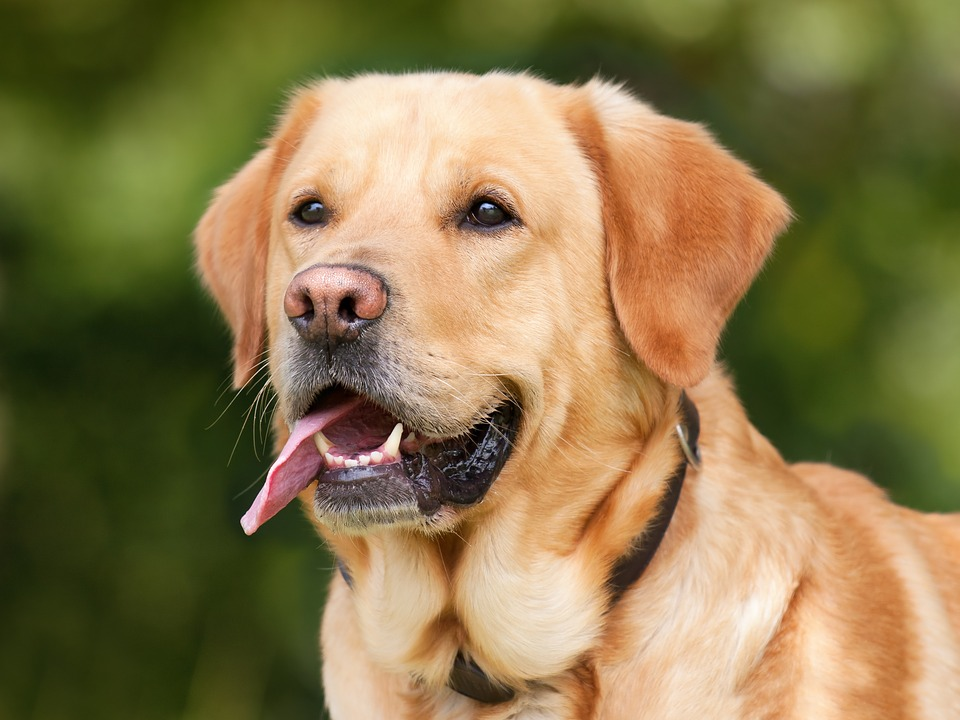

In [ ]:
# Membaca dan menampilkan gambar yang diprediksi
import cv2 as cv
from google.colab.patches import cv2_imshow

img = cv.imread('/content/drive/MyDrive/Kuliah_SMT_5/ML/dataset/single_prediction/cat_or_dog_1.jpg')
print(prediction)
cv2_imshow(img)